# How Much of the World Has Access to the Internet?

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

# How Much of the World Has Access to the Internet?

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [29]:
# Reading the given csv files into DataFrames, checking the number of rows and nulls, as well as the structure

internet = pd.read_csv('data/internet.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          7089 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            7089 non-null   int64  
 3   Internet_Usage  7089 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.7+ KB


In [30]:
internet.head(35)

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.000000
1,Afghanistan,AFG,1991,0.000000
2,Afghanistan,AFG,1992,0.000000
3,Afghanistan,AFG,1993,0.000000
4,Afghanistan,AFG,1994,0.000000
5,Afghanistan,AFG,1995,0.000000
6,Afghanistan,AFG,2001,0.004723
7,Afghanistan,AFG,2002,0.004561
8,Afghanistan,AFG,2003,0.087891
9,Afghanistan,AFG,2004,0.105809


In [31]:
people = pd.read_csv('data/people.csv')
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB


In [32]:
broadband = pd.read_csv('data/broadband.csv')
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   3888 non-null   object 
 1   Code                     3617 non-null   object 
 2   Year                     3888 non-null   int64  
 3   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB


In [33]:
#checking the range of years available in each DataFrame
all_years_i = internet['Year'].unique()
np.sort(all_years_i)

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [34]:
all_years_p = people['Year'].unique()
np.sort(all_years_p)

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [35]:
all_years_b = broadband['Year'].unique()
np.sort(all_years_b)

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

#### The dataset examination showed the following:
- There are different aggregation levels in the 'Entity' column (country, region).
- For all three tables, the null values are present only in the 'Code' column, in rows corresponding to regions.
- The number of rows differs, most probably due to a diffent range of years for each table (1990-2019 in 'Internet', 1990-2020 in 'People', and 1998-2020 in 'Broadband'), as well as missing years for some countries.

In [36]:
#merging three datasets and checking that I haven't lost any data for 'Internet_Usage', 'Users', and 'Broadband_Subscriptions'
df_two = pd.merge(internet,people, on=['Entity', 'Code', 'Year'], how='outer')
df_full = pd.merge(df_two,broadband, on=['Entity', 'Code', 'Year'], how='outer')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8008 entries, 0 to 8007
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   8008 non-null   object 
 1   Code                     6284 non-null   object 
 2   Year                     8008 non-null   int64  
 3   Internet_Usage           7089 non-null   float64
 4   Users                    6379 non-null   float64
 5   Broadband_Subscriptions  3888 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 437.9+ KB


In [37]:
#filtering out the rows with regions and groups, because they don't add any info for this analysis
df_countries_only = df_full[df_full['Code'].notnull()]

#checking the list of countries for weird entries
df_countries_only['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French P

In [38]:
#'World' is another level of aggregation, and should be filtered out
df_countries_only = df_countries_only[df_countries_only['Entity'] != 'World']

#### Adding Regions as per the World Bank
In order to include region-level to my analysis, I need to load and add as a column the [region classification as per the World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups).

In [39]:
#getting the regions' classification as per the World Bank, using BeautifulSoup, and saving it in 'regions' dictionary
url = "https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups"
page = requests.get(url)
page.encoding = 'utf-8'
soup = BeautifulSoup(page.text)

regions = {
            'Middle East & North Africa': [],
            'Latin America & Caribbean': [], 
            'East Asia & Pacific': [],
            'South Asia': [],
            'North America': [],
            'Europe & Central Asia': []}

labels = {2:'Europe & Central Asia',
          4:'Middle East & North Africa',
          3:'Latin America & Caribbean',
          1:'East Asia & Pacific',
          6:'South Asia',
          5:'North America'}
for index, table in enumerate(soup.find_all('table')):
    if index not in labels:
        continue
    else:
        for tr in table.find_all('tr'):
            for td in tr.find_all('td'):
                if td.text != '':
                    regions[labels[index]].append(td.text)


In [40]:
#Adding regions to the df_countries_only to get a full DataFrame with all values for all years and a 'Region' column

df_all_years = df_countries_only.sort_values(by=['Entity', 'Year'])

for lab, row in df_all_years.iterrows():
    for key, values in regions.items():
        if row['Entity'] in values:
            df_all_years.loc[lab, 'Region'] = key
            
df_all_years.head(1)

,Entity,Code,Year,Internet_Usage,Users,Broadband_Subscriptions,Region
0,Afghanistan,AFG,1990,0.0,0.0,NaN,South Asia


#### Let's prepare a table that answers the first two questions:
1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?

In [41]:
#creating a DataFame with one last available observation for % of pop. per country (2019 or earlier) and adding a 'Global Rank' column
last_observation_percent = df_all_years[df_all_years['Internet_Usage'].notna()].groupby(['Entity'], as_index=False)[['Year']].max()
top_percent = pd.merge(last_observation_percent, df_all_years, on=['Entity', 'Year'], how='left')
top_percent['Global Rank'] = top_percent['Internet_Usage'].rank(method='dense', ascending=False)

In [42]:
#reordering, renaming, filtering, etc. the columns in order to better convey the information
top_percent_countries = top_percent[['Global Rank', 'Entity', 'Year', 'Internet_Usage','Users','Region']].sort_values(by='Global Rank').rename(columns={'Entity':'Country','Internet_Usage':'% of Population Using Internet', 'Users':'Number of Users'})
top_percent_countries.reset_index(drop=True, inplace=True)
top_percent_countries['% of Population Using Internet'] = round(top_percent_countries['% of Population Using Internet'],2)
top_percent_countries.head()

,Global Rank,Country,Year,% of Population Using Internet,Number of Users,Region
0,1.0,Bahrain,2019,99.70,1489735.0,Middle East & North Africa
1,2.0,Qatar,2019,99.65,2797495.0,Middle East & North Africa
2,3.0,Liechtenstein,2017,99.55,37744.0,Europe & Central Asia
3,4.0,Kuwait,2019,99.54,4420795.0,Middle East & North Africa
4,5.0,United Arab Emirates,2019,99.15,9133361.0,Middle East & North Africa


#### Let's dive into the data on % of the population using the Internet for the following regions: 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia', and prepare data for later visualization.

In [43]:
#getting a DataFrame with Internet usage per country with Region and Global Rank info
top_per_region = top_percent[['Region', 'Entity', 'Year', 'Internet_Usage', 'Global Rank']].sort_values('Internet_Usage', ascending=False).reset_index(drop=True)


In [44]:
#ranking countries inside each group (nulls sorted out) and getting top five for each
top_per_region['Rank per Region'] = top_per_region[top_per_region['Region'].notna()].groupby('Region')['Internet_Usage'].rank(method='min', ascending=False).astype(dtype='int32')
top_fives = top_per_region[['Region', 'Rank per Region', 'Entity', 'Internet_Usage', 'Global Rank']][top_per_region['Rank per Region'] < 6].sort_values(['Region', 'Rank per Region']).reset_index(drop=True)

#making the table more visually pleasing
top_fives['Internet_Usage'] = round(top_fives['Internet_Usage'],2)
top_fives.rename(columns={'Entity':'Country', 'Internet_Usage': '% of Population Using Internet'}, inplace=True)

In [45]:
#preparing palette for the visualization of regions

colour = {'Europe & Central Asia':'darkorange',
          'Middle East & North Africa': 'tomato',
          'Latin America & Caribbean': 'darkcyan',
          'East Asia & Pacific': 'royalblue',
          'South Asia': 'rebeccapurple',
          'North America': 'olivedrab',
         'not specified': 'slategray'}

In [46]:
#getting the median Internet Usage for these five regions as a measure less affected by outliers than mean for later visualization
per_region = df_all_years[df_all_years['Internet_Usage'].notna()].groupby(['Region', 'Year'], as_index=False)[['Internet_Usage']].median()

#getting the latest observations for all six regions
per_region_latest = per_region.groupby('Region', as_index=False)[['Year']].max()
per_region_latest = pd.merge(per_region_latest, per_region, on=['Region', 'Year'], how='left')
per_region_latest.rename(columns={'Year': 'Latest Observation', 'Internet_Usage': '% of Population Using the Internet'}, inplace=True)

#### Let's prepare data to answer the question about 5 countries with the most Internet users.

In [47]:
top_users = df_all_years.groupby('Entity', as_index=False)[['Users']].max().sort_values(by='Users',ascending=False).reset_index(drop=True)
top_five_users = top_users.head(5)
top_five_users.rename(columns={'Entity':'Country', 'Users': 'Number of Internet Users'}, inplace=True)
top_five_users

,Country,Number of Internet Users
0,China,1.003219e+09
1,India,6.004464e+08
2,United States,3.053713e+08
3,Brazil,1.734196e+08
4,Indonesia,1.460598e+08


#### Exploring coefficient of correlation between Internet usage (population share) and broadband subscriptions for 2019.

In [48]:
#creating a df with data for 2019 only
df_2019 = df_all_years[df_all_years['Year'] == 2019]
df_2019.loc[df_2019['Region'].isna(), 'Region'] = 'not specified'

#calculation the Pearson correlation coefficient
correlation = round(df_2019["Internet_Usage"].corr(df_2019["Broadband_Subscriptions"]),2)

# Report and Visualizations

The <mark>top five countries with the highest Internet use by population share</mark> (according to the last available observation for each country) are:
- **Bahrain**
- **Qatar**
- **Liechtenstein**
- **Kuwait**
- **United Arab Emirates**

Four out of five belong to the Middle East & North Africa region, and one to Europe & Central Asia.

The percentages for the five countries are very similar, in the range between 99% and 100%. However, the number of users varies quite a lot, given the different sizes of the countries. If we take the last available observation for each country, the number of Internet users will range between 37 744 and 9 133 361.

Although we don't have this data for Liechtenstein, the <mark>number of people who had in 2019 access to the Internet in these countries</mark> can be seen in the following table:

In [49]:
top_percent_countries.head()


,Global Rank,Country,Year,% of Population Using Internet,Number of Users,Region
0,1.0,Bahrain,2019,99.70,1489735.0,Middle East & North Africa
1,2.0,Qatar,2019,99.65,2797495.0,Middle East & North Africa
2,3.0,Liechtenstein,2017,99.55,37744.0,Europe & Central Asia
3,4.0,Kuwait,2019,99.54,4420795.0,Middle East & North Africa
4,5.0,United Arab Emirates,2019,99.15,9133361.0,Middle East & North Africa


We have seen that four out of five top countries with the highest percentage of people using the Internet belong to the Middle East. This observation invites us to have a closer look at at six following regions, as defined by the [World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups):
- Middle East & North Africa
- Latin America & Caribbean
- East Asia & Pacific
- South Asia
- North America
- Europe & Central Asia

The table below contains detailed information, including Rank per Region and Global Rank, for the <mark>top 5 countries with the highest Internet use for each of the mentioned regions</mark>.

In [50]:
top_fives.style.set_precision(0).background_gradient(subset=['Rank per Region','Global Rank'], cmap='crest')

,Region,Rank per Region,Country,% of Population Using Internet,Global Rank
0,East Asia & Pacific,1,Japan,91,26
1,East Asia & Pacific,2,New Zealand,91,27
2,East Asia & Pacific,3,Singapore,89,33
3,East Asia & Pacific,4,Australia,87,38
4,East Asia & Pacific,5,Malaysia,84,46
5,Europe & Central Asia,1,Liechtenstein,100,3
6,Europe & Central Asia,2,Iceland,99,6
7,Europe & Central Asia,3,Denmark,98,8
8,Europe & Central Asia,4,Norway,98,9
9,Europe & Central Asia,5,Luxembourg,97,12


It is interesting to observe that the Global Rank for these top five countries is quite varied across the table (ranging from 1 to 178 for 28 observations), but tends to be similar for all countries in the same regions.

A <mark>visualization for those five regions' Internet usage over time</mark> might shade more light on this issue.

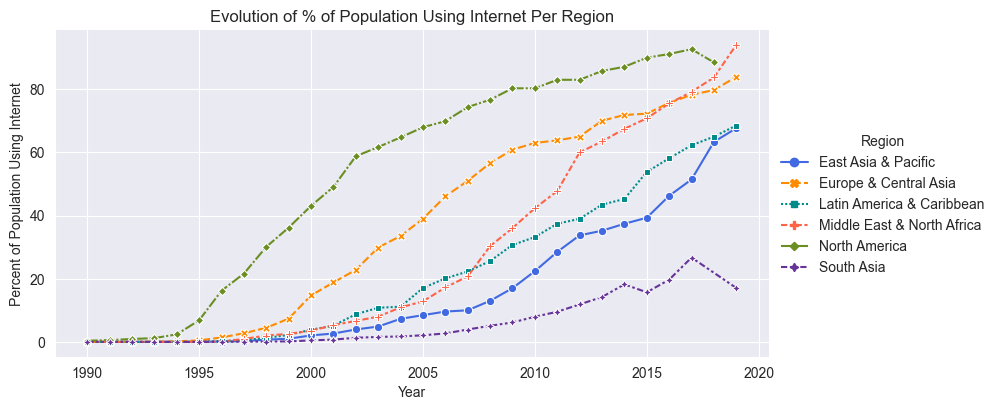

In [51]:
#plotting the evolution of the median of % of pop. per region
sns.set_style('darkgrid')
sns.relplot(x='Year', y='Internet_Usage', data=per_region, kind='line', style='Region', hue='Region', palette=colour, markers=True, height=4, aspect=2)
plt.xlabel('Year')
plt.ylabel('Percent of Population Using Internet')
plt.title("Evolution of % of Population Using Internet Per Region")
plt.show()

Although all six regions experienced significant growth in % of the population using the Internet over the last 30 years, the scale of this growth is not the same. While the median values for the Middle East & North Africa (94%), North America (88%) and Europe & Central Asia (84%) passed the threshold of 80% in the late 2010s, the median for Latin America & Caribbean (69%) and East Asia & Pacific(68%) failed to surpass 70%. As for South Asia, its median share of the population with access to the Internet is 17%, which differs drastically from the rest of the analysed regions.

In [52]:
per_region_latest.style.set_precision(0).background_gradient(subset='% of Population Using the Internet', cmap='flare')

,Region,Latest Observation,% of Population Using the Internet
0,East Asia & Pacific,2019,68
1,Europe & Central Asia,2019,84
2,Latin America & Caribbean,2019,69
3,Middle East & North Africa,2019,94
4,North America,2018,88
5,South Asia,2019,17


Having already seen the top five countries by share of the population using the Internet, let's glance at <mark>the five countries with the most Internet users</mark>.

In [53]:
top_five_users

,Country,Number of Internet Users
0,China,1.003219e+09
1,India,6.004464e+08
2,United States,3.053713e+08
3,Brazil,1.734196e+08
4,Indonesia,1.460598e+08


These seem to be one of the most populated countries as well. Curiously, none of these have appeared in our previous top five by share of population using the Internet.

Instead, let's plot the <mark>correlation between Internet usage (population share) and broadband subscriptions for 2019</mark>.

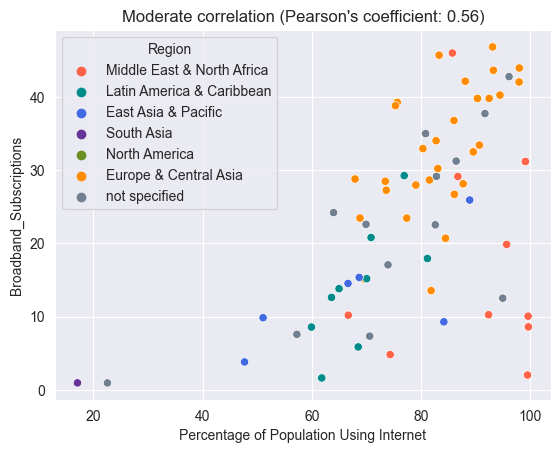

In [54]:
#visualization
sns.set_style('darkgrid')
sns.scatterplot(x='Internet_Usage', y='Broadband_Subscriptions', data=df_2019, hue='Region', hue_order=['Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia', 'not specified'],palette=colour)
plt.xlabel('Percentage of Population Using Internet')
plt.ylabel('Broadband_Subscriptions')
plt.title(f"Moderate correlation (Pearson's coefficient: {correlation})")
plt.show()

There seems to be a moderate positive correlation of 0.56 between the number of broadband subscriptions and the share of the population using the Internet.